### 분류 성능평가 지표
* metrics 서브 패키지
    - confusion_matrix(answer, prediction)
    - accuracy_score()
    - precision_score()
    - recall_score()
    - f1_score()
    - classification_report()
    - roc_curve()
    - auc()

In [1]:
y_test = [1, 0, 0, 1, 1, 1, 0, 1, 1, 1]
y_pred = [0, 1, 1, 1, 1, 0, 1, 0, 1, 0]

for i in range(len(y_test)):
    tp = tn = fp = fn =0
    # TP
    if y_test[i] == 1 and y_pred[i]==1:
        tp += 1
    # TN
    if y_test[i] == 0 and y_pred[i]==0:
        tn += 1
    # FP
    if y_test[i] == 0 and y_pred[i]==1:
        fp += 1
    # FN
    if y_test[i] == 1 and y_pred[i]==0:
        fn += 1

In [2]:
from sklearn.metrics import confusion_matrix

y_true = [2,0,2,2,0,1]
y_pred = [0,0,2,2,0,2]

In [3]:
# 분류결과표
confusion_matrix(y_true, y_pred)

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]], dtype=int64)

### 이진 분류표
- 제품을 생산하는 제조공장에 품질 테스트를 실시하여 불량품을 찾아내고, 불량품을 공장으로 돌려보낸다(recall)
- 품질 테스트의 결과가 양성 positive -> 불량품, 음성 negative -> 정상 제품

- TP : 불량품을 불량품으로 예측
- TN : 정상을 정상으로 예측
- FP : 정상을 불량으로 예측, 1종 오류
- FN : 불량을 정상으로 예측, 2종 오류

In [4]:
y_true = [1,0,1,1,0,1]
y_pred = [0,0,1,1,0,1]

confusion_matrix(y_true, y_pred)

array([[2, 0],
       [1, 3]], dtype=int64)

In [5]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [6]:
### fit() 메서드는 아무 것도 수행하지 않고, predict()는 Sex 피처가 1이면 0, 그렇지 않으면 1로 예측하는 단순한 분류기 생성
from sklearn.base import BaseEstimator

class MyDummyClassifier(BaseEstimator):
    # fit 메서드는 아무것도 학습하지 않음
    def fit(self, X, y=None):
        pass
    # predict 메서드는 단순히 Sex 피처가 1이면 0, 아니면 1로 예측
    def predict(self, X):
        pred = np.zeros( (X.shape[0],1) )
        for i in range(X.shape[0]):
            if X['Sex'].iloc[i] == 1:
                pred[i] = 0
            else :
                pred[i] = 1 
        return pred

In [28]:
titanic = pd.read_csv('./data/titanic_train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [29]:
titanic_label_df = titanic['Survived']
titanic_feature_df = titanic.drop(['Survived'], axis=1)
print(titanic_feature_df)
print(titanic_label_df)

     PassengerId  Pclass                                               Name  \
0              1       3                            Braund, Mr. Owen Harris   
1              2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2              3       3                             Heikkinen, Miss. Laina   
3              4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4              5       3                           Allen, Mr. William Henry   
..           ...     ...                                                ...   
886          887       2                              Montvila, Rev. Juozas   
887          888       1                       Graham, Miss. Margaret Edith   
888          889       3           Johnston, Miss. Catherine Helen "Carrie"   
889          890       1                              Behr, Mr. Karl Howell   
890          891       3                                Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch            Ticket  

In [30]:
## Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

## 머신러닝에 불필요한 피처 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

## Label Encoding 수행
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

## 앞에서 실행한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [31]:
titanic_feature_df = transform_features(titanic_feature_df)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(titanic_feature_df, titanic_label_df, test_size=.2, random_state=10)

In [13]:
dummy_model = MyDummyClassifier()
dummy_model.fit(X_train, y_train)

In [14]:
y_pred = dummy_model.predict(X_test)
print('정확도: ',accuracy_score(y_pred, y_test))

정확도:  0.8212290502793296


#### 업무 특성에 따라서 특정 지표를 활용해야 한다.
- Recall : 암, 사기판정
    - recall_score()
- Precision : 스펨메일 분류
    - precision_score()

In [15]:
from sklearn.metrics import recall_score, precision_score,f1_score

In [16]:
def display_eval(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    print()
    print(confusion)
    print('정확도 : {}, 정밀도 : {}, 재현율 : {}'.format(accuracy, precision,  recall))

In [33]:
from sklearn.linear_model import LogisticRegression
# 로지스틱 회귀
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
prediction = lr_model.predict(X_test)
display_eval(y_test, prediction)

accuracy 0.8268156424581006
precision 0.746031746031746
recall 0.7580645161290323


In [18]:
#      False True
# False  TN   FP
# True   FN   TP

정확도 = (101+47)/(101+16+15+47)
print(정확도)

정밀도 = 47/(47+16)
print(정밀도)

리콜 = 47/(47+15)
print(리콜)

0.8268156424581006
0.746031746031746
0.7580645161290323


In [19]:
# [실습] - 유방암 관련 데이터, 재현율이 중요
# 재현율은 실제 양성을 양성으로 예측한 비율이므로 높을수록 좋은 모형이라 판단한다

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier

In [20]:
cancer = load_breast_cancer()
print(type(cancer))

<class 'sklearn.utils.Bunch'>


In [21]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [22]:
# 데이터 프레임으로 구조를 변경해서 확인해보자
cancer_df = pd.DataFrame(data = cancer.data, columns=cancer.feature_names)
cancer_df['target']=cancer.target
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [23]:
from sklearn.model_selection import StratifiedKFold

feature = cancer_df.iloc[:, :-1]
label = cancer_df.iloc[:,-1]
skfold = StratifiedKFold(n_splits=3)

# 분류 학습기
dtc = RandomForestClassifier()

# 학습 & 평가 (교차 검증)
accuracy_list = []
precision_list = []
recall_list = []

for train_idx, test_idx in skfold.split(feature, label):
    feature_train = feature.iloc[train_idx]
    feature_test = feature.iloc[test_idx]
    
    label_train = label.iloc[train_idx]
    label_test = label.iloc[test_idx]
    
    dtc.fit(feature_train, label_train)
    
    pred = dtc.predict(feature_test)
    
    accuracy = accuracy_score(label_test, pred)
    accuracy_list.append(accuracy)
    
    precision = precision_score(label_test, pred)
    precision_list.append(precision)
    
    recall = recall_score(label_test, pred)
    recall_list.append(recall)
    
# 평가 지표에 대한 평균값(accuracy, precision, recall)
print('평균 정확도 : {}, 평균 정밀도 : {}, 평균 재현율 : {}'.format(
np.mean(accuracy_list), np.mean(precision_list), np.mean(recall_list)))

평균 정확도 : 0.9578297595841455, 평균 정밀도 : 0.9566966161727333, 평균 재현율 : 0.9775910364145658


In [24]:
from sklearn.model_selection import cross_validate, KFold
from sklearn.metrics import make_scorer

dtc = RandomForestClassifier()

fold = KFold(n_splits=20, random_state=1, shuffle=True)

scoring = {
    'accuracy': make_scorer(accuracy_score),'precision' :make_scorer(precision_score), 
    'recall' : make_scorer(recall_score), 'f1_score': make_scorer(f1_score)
}
result = cross_validate(dtc, feature, label, cv=fold, scoring=scoring)
print(result.keys())

dict_keys(['fit_time', 'score_time', 'test_accuracy', 'test_precision', 'test_recall', 'test_f1_score'])


In [25]:
print('accuracy', result['test_accuracy'].mean())
print('precision', result['test_precision'].mean())
print('recall', result['test_recall'].mean())
print('f1', result['test_f1_score'].mean())


accuracy 0.9668103448275863
precision 0.9714993632845967
recall 0.9770594070961718
f1 0.9732526365528151


In [26]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data,
                                                    cancer.target,
                                                    test_size=0.2)



from sklearn.model_selection import GridSearchCV

random_forest = RandomForestClassifier(random_state=123)


params = {
    'n_estimators' : [200, 300],
    'max_features' : [8, 10],
    'max_depth'    : [4, 6]
}


Grid_rf = GridSearchCV(random_forest, 
                       param_grid = params,
                       cv         = 3,
                       scoring    = 'recall')

Grid_rf.fit(X_train, y_train)
print(Grid_rf.best_params_)
print(Grid_rf.best_score_)

# {'max_depth': 4, 'max_features': 8, 'n_estimators': 200}
# 0.9669922669922671


# test set 예측

y_pred = Grid_rf.best_estimator_.predict(X_test)
# 모델성능평가 함수
def display_eval(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    print('accuracy' , accuracy)
    print('precision' , precision)
    print('recall' , recall)

display_eval(y_test, y_pred)

{'max_depth': 4, 'max_features': 10, 'n_estimators': 300}
0.9758018327605956
accuracy 0.956140350877193
precision 0.9565217391304348
recall 0.9705882352941176


#### fallout : 실제 양성 클래스에 속하지 않는 표본 중에 양성 클래스에 속한다고 예측한 표본의 비율
- 낮아야 좋은 모형으로 본다.
- 실제 정상거래인데 사기 거래 예측한 거래의 비율(False Positive Rate)
- FP/ FP+TN

### precision & recall Trade off
- predict_proba() : 예측된 레이블의 확률 반환

In [42]:
# titanic Logistic Regression 모델을 이용합니다.

pred_pro_result = lr_model.predict_proba(X_test)
print('result: \n',pred_pro_result[:5])
print('shape: ',pred_pro_result.shape)

y_pred = lr_model.predict(X_test)
print(y_pred)

result = np.concatenate([pred_pro_result, y_pred.reshape(-1,1)], axis=1)
print('확률에 따른 예측 결과\n', result[:5])

result: 
 [[0.90629139 0.09370861]
 [0.85357524 0.14642476]
 [0.87703938 0.12296062]
 [0.07337861 0.92662139]
 [0.10654399 0.89345601]]
shape:  (179, 2)
[0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 0 1 0 1 0 1
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1
 0 1 0 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 0 1 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 0
 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1]
확률에 따른 예측 결과
 [[0.90629139 0.09370861 0.        ]
 [0.85357524 0.14642476 0.        ]
 [0.87703938 0.12296062 0.        ]
 [0.07337861 0.92662139 1.        ]
 [0.10654399 0.89345601 1.        ]]


- Binarizer 클래스 fit_transform()


In [46]:
from sklearn.preprocessing import Binarizer

user_threshold = 0.5
positive_pred_proba = pred_pro_result[:,1].reshape(-1,1)
user_predict = Binarizer(threshold=user_threshold).fit(positive_pred_proba).transform(positive_pred_proba)
display_eval(y_test, user_predict)

accuracy 0.8268156424581006
precision 0.746031746031746
recall 0.7580645161290323


In [48]:
user_threshold = 0.2
positive_pred_proba = pred_pro_result[:,1].reshape(-1,1)
user_predict = Binarizer(threshold=user_threshold).fit(positive_pred_proba).transform(positive_pred_proba)
display_eval(y_test, user_predict)

accuracy 0.7262569832402235
precision 0.5670103092783505
recall 0.8870967741935484


- threshold 를 낮추면 재현율은 올라가고, 정밀도는 내려간다.
- precision_recall_curve(정답, 예측확률값) : 정밀도와 재현율 반환

In [49]:
from sklearn.metrics import precision_recall_curve

In [53]:
# 레이블 값이 1일 때의 예측 확률 추출
pre_positive_label = lr_model.predict_proba(X_test)[:,1]
# print(pre_positive_label)
precisions, recalls, thresholds = precision_recall_curve(y_test, pre_positive_label)
print('precisions: \n',precisions, '\n recalls :\n',recalls, '\n thresholds : \n', thresholds)

precisions: 
 [0.35632184 0.35260116 0.35465116 0.35672515 0.35882353 0.36094675
 0.36309524 0.36526946 0.36746988 0.36969697 0.37195122 0.37423313
 0.37654321 0.37888199 0.38125    0.3836478  0.38607595 0.38853503
 0.39102564 0.39354839 0.3961039  0.39869281 0.40131579 0.40397351
 0.40666667 0.40939597 0.40540541 0.40136054 0.39726027 0.4
 0.40559441 0.4084507  0.41428571 0.42335766 0.42647059 0.42962963
 0.43283582 0.43939394 0.44274809 0.43846154 0.43410853 0.4375
 0.44094488 0.4516129  0.45528455 0.45901639 0.46280992 0.46666667
 0.47058824 0.47457627 0.47863248 0.48275862 0.47826087 0.48245614
 0.48672566 0.49107143 0.4954955  0.5        0.50458716 0.50925926
 0.51401869 0.51886792 0.52380952 0.52884615 0.53398058 0.53921569
 0.54455446 0.55       0.55555556 0.56701031 0.57291667 0.57894737
 0.58510638 0.6043956  0.61111111 0.61797753 0.625      0.63218391
 0.62790698 0.62352941 0.63095238 0.63855422 0.64634146 0.65432099
 0.65       0.65822785 0.65384615 0.66233766 0.65789474 0.6

In [54]:
print(thresholds.shape)

(162,)


- 시각화(임계값 변화에 따른 정밀도, 재현율 시각화)

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline

No handles with labels found to put in legend.


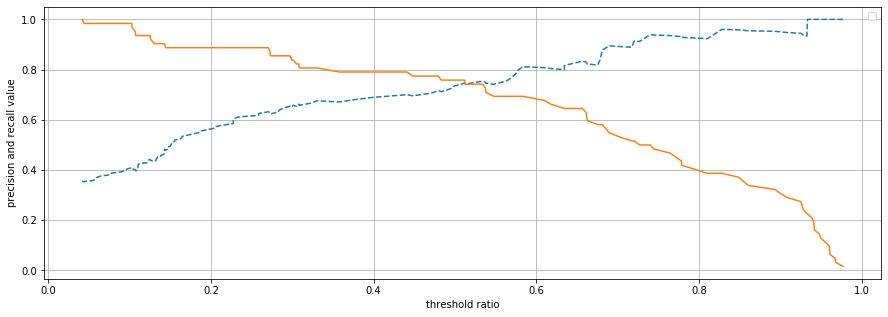

In [63]:
plt.figure(figsize=(15,5))
plt.xlabel('threshold ratio')
plt.ylabel('precision and recall value')

plt.plot(thresholds, precisions[0:thresholds.shape[0]], linestyle='--', label='precision')
plt.plot(thresholds, recalls[0:thresholds.shape[0]], label='recall')

plt.grid()
plt.show()

- 타이타닉을 이용한 생존자 예측 FPR, TPR, 임계값 
    - roc_curve(실제값, 예측확률 값)
    

In [69]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일 때의 예측 확률 추출
pre_positive_label = lr_model.predict_proba(X_test)[:,1]

fprs, tprs, thresholds = roc_curve(y_test, pre_positive_label)
# print(fprs.shape[0])
# print(tprs.shape[0])
# print(thresholds.shape[0])

print('샘플 추출: ')
print()
thr_idx = np.arange(1, thresholds.shape[0], 5)
print('thr idx : ',thr_idx)
print('thr treshold value: ',thresholds[thr_idx])
print('fprs value: ',fprs[thr_idx])
print('tprs value: ',tprs[thr_idx])

# 출력 결과를 보면 임계값이 1에 가까워질수록 FPR이 커지면서 TPR도 증가

샘플 추출: 

thr idx :  [ 1  6 11 16 21 26 31 36 41 46 51]
thr treshold value:  [0.97697207 0.74013778 0.68126993 0.54757516 0.47932086 0.30850514
 0.2969601  0.20471103 0.13223215 0.11070016 0.1075088 ]
fprs value:  [0.         0.01709402 0.04273504 0.12820513 0.16239316 0.22222222
 0.23931624 0.35897436 0.60683761 0.67521368 0.75213675]
tprs value:  [0.01612903 0.5        0.58064516 0.69354839 0.77419355 0.80645161
 0.85483871 0.88709677 0.90322581 0.93548387 0.93548387]


No handles with labels found to put in legend.


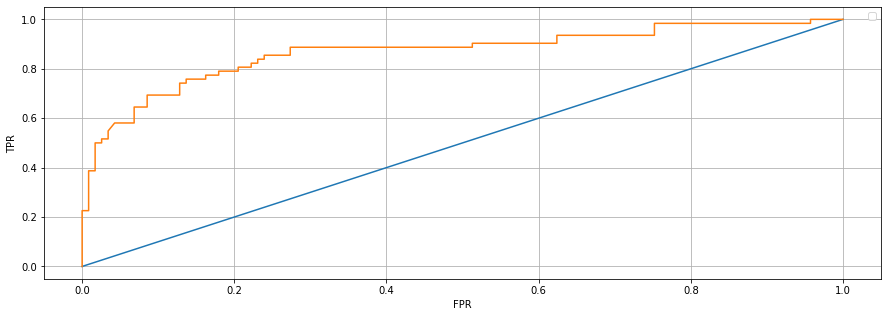

In [71]:
# 레이블 값이 1일 때의 예측 확률 추출
pre_positive_label = lr_model.predict_proba(X_test)[:,1]

fprs, tprs, thresholds = roc_curve(y_test, pre_positive_label)

plt.figure(figsize=(15,5))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()

# 대각선 
plt.plot([0,1], [0,1])

# 곡선 ROC
plt.plot(fprs, tprs, label='ROC')

plt.grid()
plt.show()

In [74]:
from sklearn.metrics import roc_auc_score

# 로지스틱 회귀
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
prediction = lr_model.predict(X_test)

print('roc auc value', roc_auc_score(y_test, prediction))

roc auc value 0.8106561896884479
